<a href="https://colab.research.google.com/github/chikusih/chikusih/blob/main/New_Hiv_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the require libraries

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from tensorflow import feature_column
import itertools
plt.style.use('fivethirtyeight')

In [3]:
# Get SCV FILE
# Get SCV FILE
from google.colab import files
uploaded = files.upload()

Saving index_contacts_new.csv to index_contacts_new.csv


# Get SCV FILE
from google.colab import files
uploaded = files.upload()

In [4]:
import io
Index_data = pd.read_csv(io.BytesIO(uploaded['index_contacts_new.csv']))
# Dataset is now stored in a Pandas Dataframe
Index_data

,client_id,Hiv_Index_Contact_Registration,Date,Site,Region,Sex_of_Index,Age_of_client_index,Type_ of_ relationship,Hiv_status
0,468,Hiv Index Contact Registration,9/16/2020 3:00,levolosihcw,Arusha,Female,45,sexual_partner,unknown
1,469,Hiv Index Contact Registration,9/16/2020 3:00,levolosihcw,Arusha,Female,39,sexual_partner,unknown
2,469,Hiv Index Contact Registration,9/16/2020 3:00,levolosihcw,Arusha,Female,57,sexual_partner,unknown
3,469,Hiv Index Contact Registration,9/16/2020 3:00,levolosihcw,Arusha,Female,15,biological_child_under_15,unknown
4,469,Hiv Index Contact Registration,9/16/2020 3:00,levolosihcw,Arusha,Female,60,sexual_partner,unknown
...,...,...,...,...,...,...,...,...,...
7223,4504,Hiv Index Contact Registration,9/16/2020 3:00,maguguhcw,Manyara,Female,25,sexual_partner,unknown
7224,4505,Hiv Index Contact Registration,9/16/2020 3:00,maguguhcw,Manyara,Female,36,sexual_partner,unknown
7225,4505,Hiv Index Contact Registration,9/16/2020 3:00,maguguhcw,Manyara,Male,43,sexual_partner,unknown
7226,4498,Hiv Index Contact Registration,9/16/2020 3:00,maguguhcw,Manyara,Female,61,sexual_partner,unknown


In [5]:
#Adding the target colunm
client_id_dict = {} 
for client_id in Index_data["client_id"]:
    if not client_id in client_id_dict:
        client_id_dict[client_id] = 1
    else:
        client_id_dict[client_id] += 1
        client_id_dict

In [6]:
for i in range(len(Index_data)):
    client_id = Index_data.loc[i]["client_id"]
    Index_data.at[i,"number_of_Hivindex"] = client_id_dict[client_id]
    

In [7]:
Index_data

,client_id,Hiv_Index_Contact_Registration,Date,Site,Region,Sex_of_Index,Age_of_client_index,Type_ of_ relationship,Hiv_status,number_of_Hivindex
0,468,Hiv Index Contact Registration,9/16/2020 3:00,levolosihcw,Arusha,Female,45,sexual_partner,unknown,1.0
1,469,Hiv Index Contact Registration,9/16/2020 3:00,levolosihcw,Arusha,Female,39,sexual_partner,unknown,4.0
2,469,Hiv Index Contact Registration,9/16/2020 3:00,levolosihcw,Arusha,Female,57,sexual_partner,unknown,4.0
3,469,Hiv Index Contact Registration,9/16/2020 3:00,levolosihcw,Arusha,Female,15,biological_child_under_15,unknown,4.0
4,469,Hiv Index Contact Registration,9/16/2020 3:00,levolosihcw,Arusha,Female,60,sexual_partner,unknown,4.0
...,...,...,...,...,...,...,...,...,...,...
7223,4504,Hiv Index Contact Registration,9/16/2020 3:00,maguguhcw,Manyara,Female,25,sexual_partner,unknown,2.0
7224,4505,Hiv Index Contact Registration,9/16/2020 3:00,maguguhcw,Manyara,Female,36,sexual_partner,unknown,2.0
7225,4505,Hiv Index Contact Registration,9/16/2020 3:00,maguguhcw,Manyara,Male,43,sexual_partner,unknown,2.0
7226,4498,Hiv Index Contact Registration,9/16/2020 3:00,maguguhcw,Manyara,Female,61,sexual_partner,unknown,4.0


In [8]:
#sepataely Date column into 3 colunms of year, month and day
Index_data['year'] = pd.DatetimeIndex(Index_data['Date']).year
Index_data['month'] = pd.DatetimeIndex(Index_data['Date']).month
Index_data['day'] = pd.DatetimeIndex(Index_data['Date']).day

In [ ]:
Index_data.head()

,client_id,Hiv_Index_Contact_Registration,Date,Site,Region,Sex_of_Index,Age_of_client_index,Type_ of_ relationship,Hiv_status,number_of_Hivindex,year,month,day
0,468,Hiv Index Contact Registration,9/16/2020 3:00,levolosihcw,Arusha,Female,45,sexual_partner,unknown,1.0,2020,9,16
1,469,Hiv Index Contact Registration,9/16/2020 3:00,levolosihcw,Arusha,Female,39,sexual_partner,unknown,4.0,2020,9,16
2,469,Hiv Index Contact Registration,9/16/2020 3:00,levolosihcw,Arusha,Female,57,sexual_partner,unknown,4.0,2020,9,16
3,469,Hiv Index Contact Registration,9/16/2020 3:00,levolosihcw,Arusha,Female,15,biological_child_under_15,unknown,4.0,2020,9,16
4,469,Hiv Index Contact Registration,9/16/2020 3:00,levolosihcw,Arusha,Female,60,sexual_partner,unknown,4.0,2020,9,16


The date colum has been expanded to get year, month and day separately

In [ ]:
# show Some information about the dataset 
print(Index_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7228 entries, 0 to 7227
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       7228 non-null   int64  
 1   Hiv_Index_Contact_Registration  7228 non-null   object 
 2   Date                            7228 non-null   object 
 3   Site                            7228 non-null   object 
 4   Region                          7228 non-null   object 
 5   Sex_of_Index                    7228 non-null   object 
 6   Age_of_client_index             7228 non-null   int64  
 7   Type_ of_ relationship          7228 non-null   object 
 8   Hiv_status                      7228 non-null   object 
 9   number_of_Hivindex              7228 non-null   float64
 10  year                            7228 non-null   int64  
 11  month                           7228 non-null   int64  
 12  day                             72

There rae 13 colunms and dataset of 7228, data type float 64(1),int64(5) object(7) there is no missing value.

In [ ]:
#checking the data
Index_data.isnull().sum()

client_id                         0
Hiv_Index_Contact_Registration    0
Date                              0
Site                              0
Region                            0
Sex_of_Index                      0
Age_of_client_index               0
Type_ of_ relationship            0
Hiv_status                        0
number_of_Hivindex                0
year                              0
month                             0
day                               0
dtype: int64

No missing value

In [11]:
# We drop some coloumns which have already worked with and has no impact to our target
data = Index_data.drop(columns=['Hiv_Index_Contact_Registration','Date'])
data

,client_id,Site,Region,Sex_of_Index,Age_of_client_index,Type_ of_ relationship,Hiv_status,number_of_Hivindex,year,month,day
0,468,levolosihcw,Arusha,Female,45,sexual_partner,unknown,1.0,2020,9,16
1,469,levolosihcw,Arusha,Female,39,sexual_partner,unknown,4.0,2020,9,16
2,469,levolosihcw,Arusha,Female,57,sexual_partner,unknown,4.0,2020,9,16
3,469,levolosihcw,Arusha,Female,15,biological_child_under_15,unknown,4.0,2020,9,16
4,469,levolosihcw,Arusha,Female,60,sexual_partner,unknown,4.0,2020,9,16
...,...,...,...,...,...,...,...,...,...,...,...
7223,4504,maguguhcw,Manyara,Female,25,sexual_partner,unknown,2.0,2020,9,16
7224,4505,maguguhcw,Manyara,Female,36,sexual_partner,unknown,2.0,2020,9,16
7225,4505,maguguhcw,Manyara,Male,43,sexual_partner,unknown,2.0,2020,9,16
7226,4498,maguguhcw,Manyara,Female,61,sexual_partner,unknown,4.0,2020,9,16


In [12]:
data.to_csv('re_processed_data.csv',index=False)

Data exploration and visualization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

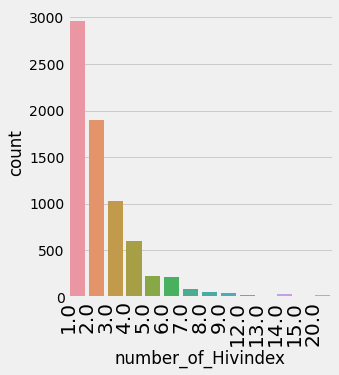

In [13]:
 #Explore Target distribution 
sns.catplot(x ="number_of_Hivindex",kind="count", data=data)
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)


Large number of client refered one person , followed by two and very few refered up to 20 people

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

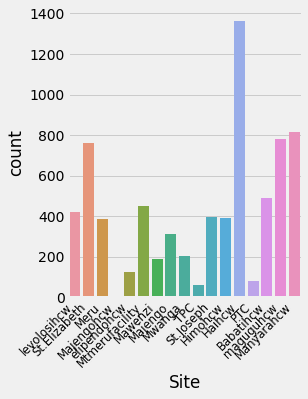

In [14]:
sns.catplot(x="Site", kind="count", data=data);

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)

Site of Haihsc has large number of client who refered large number of Hiv index follwed by Manyarahcw. Very few client at Majengohcw

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

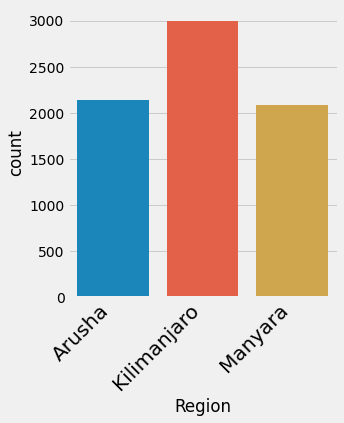

In [15]:
sns.catplot(x="Region", kind="count", data=data);

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

Arusha Region has Large number of Client who refered their index compare with the rest two

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

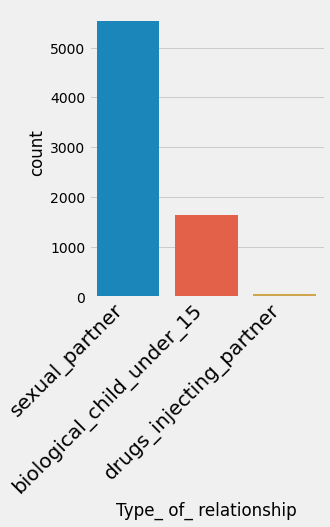

In [16]:
sns.catplot(x="Type_ of_ relationship", kind="count", data=data);

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

The diagram show that Hiv Index refered are Sexual_partner, followed by biological child under 15 and very few from drug injecting partner

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

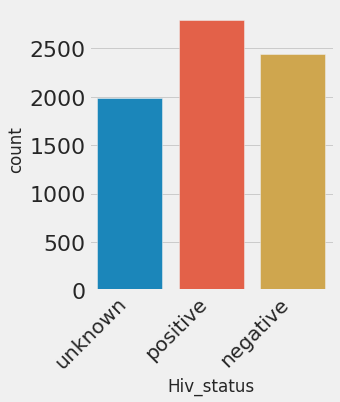

In [ ]:
sns.catplot(x="Hiv_status", kind="count", data=data);

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

Among those Hiv Index client there are still huge number of hiv indexed who do not know their status.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

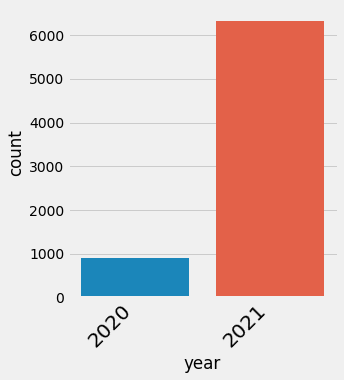

In [17]:
sns.catplot(x="year", kind="count", data=data);

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

Year 2021, show that large number of Client refered their partners compared to year 2020

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

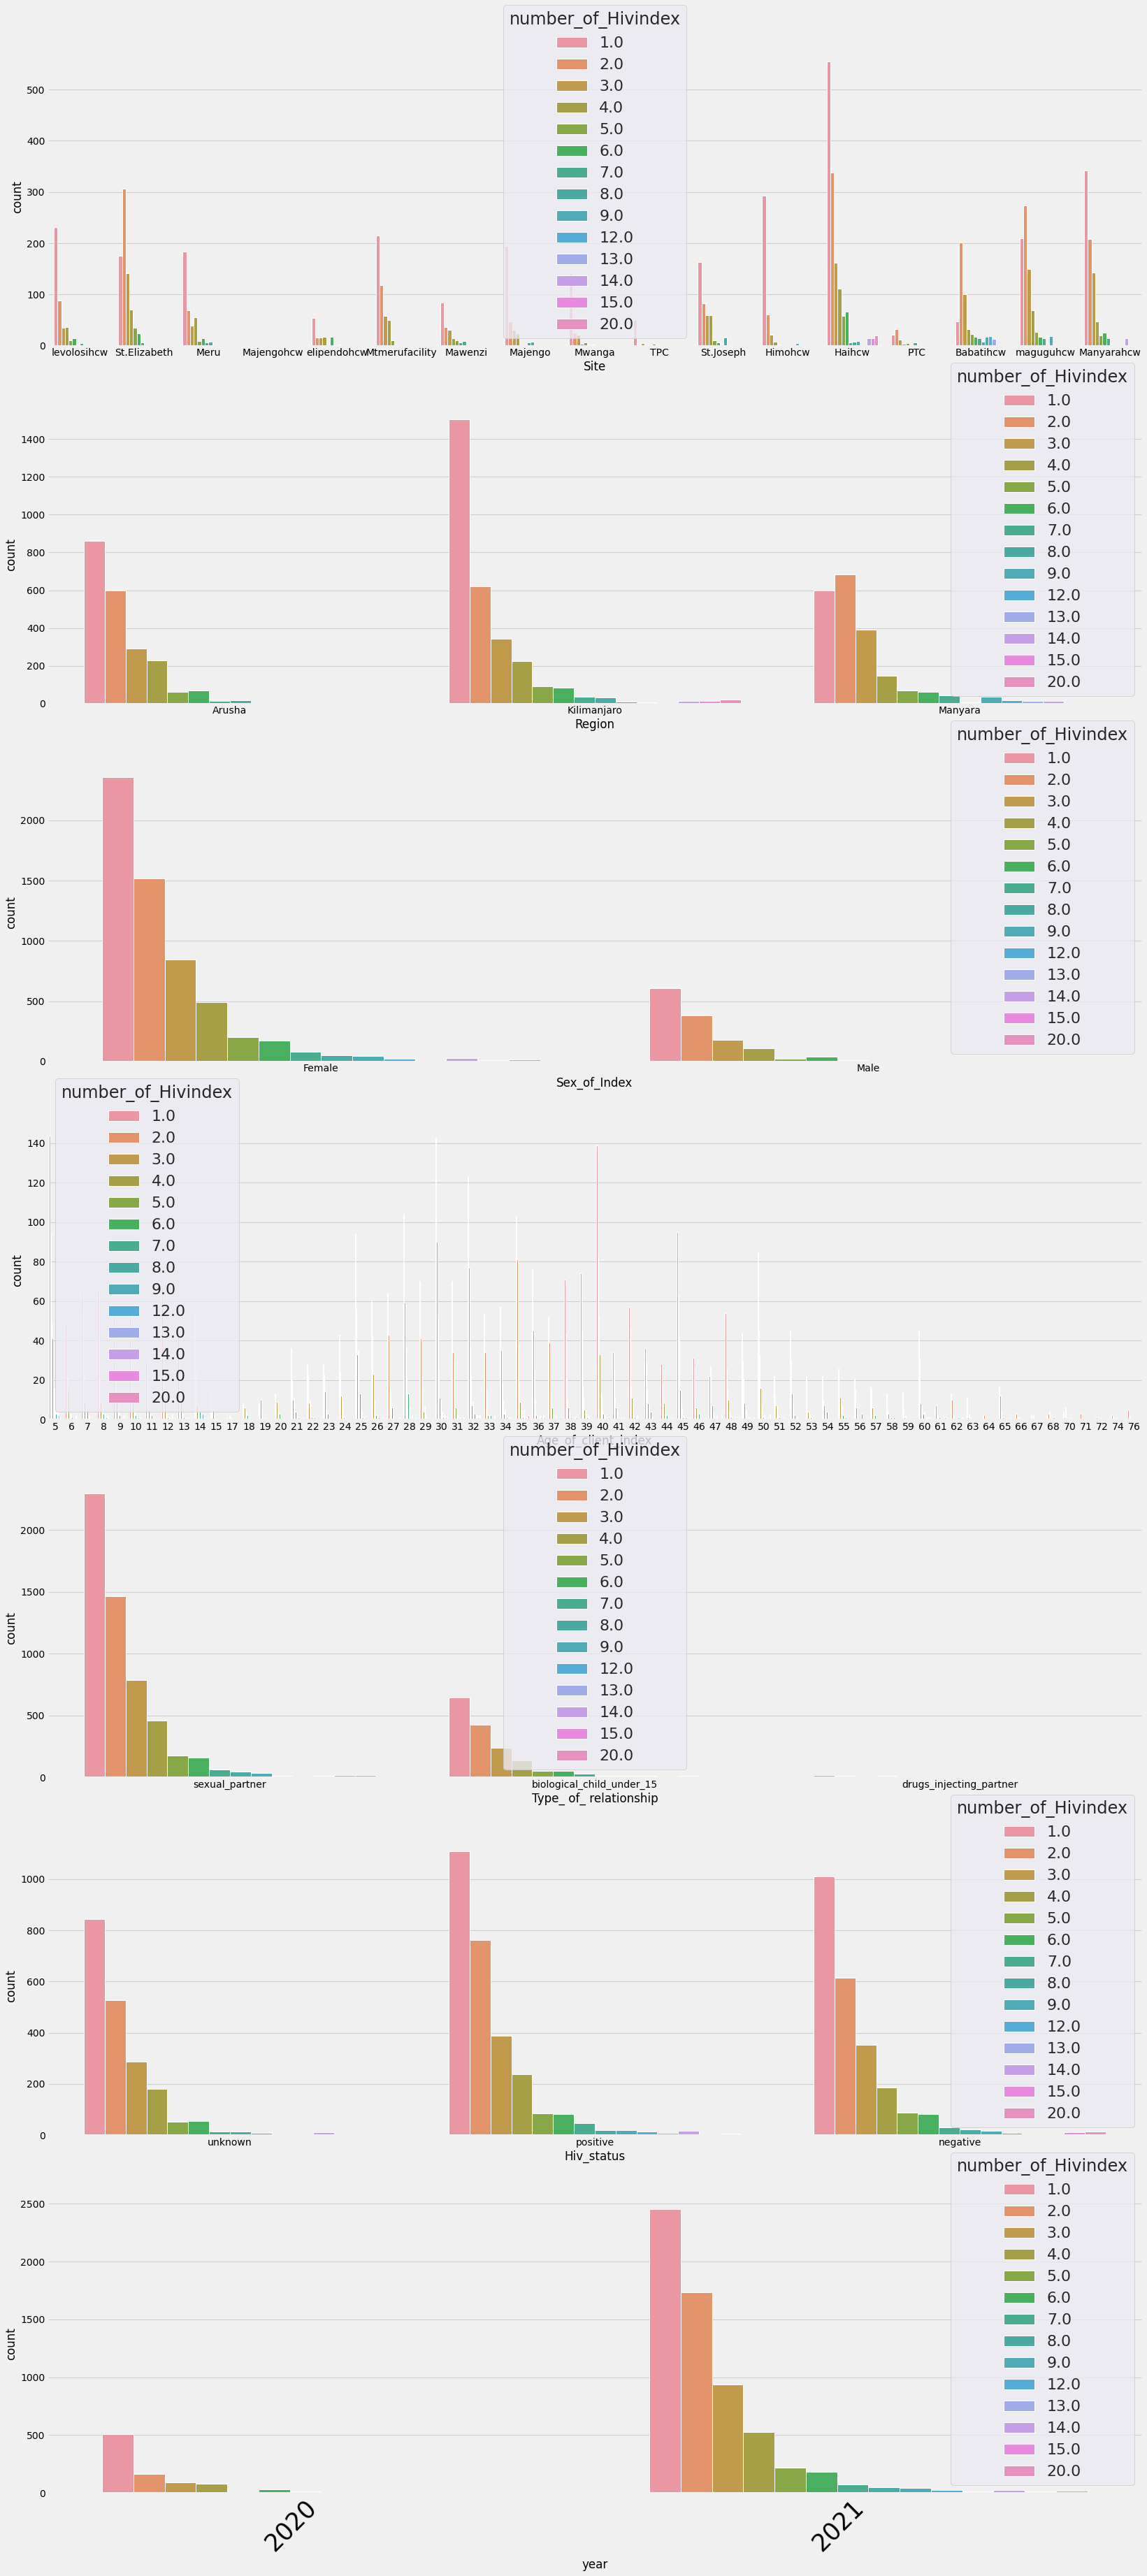

In [18]:
#Explore features vs target variable 

f, axes = plt.subplots(7, 1, figsize=[25, 60])
sns.set(font_scale = 2)
plt.rcParams["axes.labelsize"] = 15
sns.countplot('Site', hue= 'number_of_Hivindex', data=data, ax=axes[0])
sns.countplot('Region', hue= 'number_of_Hivindex', data=data, ax=axes[1])
sns.countplot('Sex_of_Index', hue= 'number_of_Hivindex', data=data, ax=axes[2])
sns.countplot('Age_of_client_index', hue= 'number_of_Hivindex', data=data, ax=axes[3])
sns.countplot('Type_ of_ relationship', hue= 'number_of_Hivindex', data=data, ax=axes[4])
sns.countplot('Hiv_status', hue= 'number_of_Hivindex', data=data, ax=axes[5])
sns.countplot('year', hue= 'number_of_Hivindex', data=data, ax=axes[6])

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

Data transformation

In [19]:
# Turn all categories into numbers
data_one_hot = pd.get_dummies(data)
data_one_hot.head() # view the converted columns

,client_id,Age_of_client_index,number_of_Hivindex,year,month,day,Site_Babatihcw,Site_Haihcw,Site_Himohcw,Site_Majengo,Site_Majengohcw,Site_Manyarahcw,Site_Mawenzi,Site_Meru,Site_Mtmerufacility,Site_Mwanga,Site_PTC,Site_St.Elizabeth,Site_St.Joseph,Site_TPC,Site_elipendohcw,Site_levolosihcw,Site_maguguhcw,Region_Arusha,Region_Kilimanjaro,Region_Manyara,Sex_of_Index_Female,Sex_of_Index_Male,Type_ of_ relationship_biological_child_under_15,Type_ of_ relationship_drugs_injecting_partner,Type_ of_ relationship_sexual_partner,Hiv_status_negative,Hiv_status_positive,Hiv_status_unknown
0,468,45,1.0,2020,9,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1
1,469,39,4.0,2020,9,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1
2,469,57,4.0,2020,9,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1
3,469,15,4.0,2020,9,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1
4,469,60,4.0,2020,9,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1


All feature turned to numerial values

In [22]:
# Create X & y values
X = data_one_hot.drop(['client_id', 'number_of_Hivindex', 'year','month','day'], axis=1)
y = data_one_hot['number_of_Hivindex']

In [23]:
# View features
X.head()
print(X.shape)

(7228, 29)


The dataset has new shap after transformation, number of colunms has increased

In [24]:
y = data_one_hot.number_of_Hivindex.astype('float32')
y.head()

0    1.0
1    4.0
2    4.0
3    4.0
4    4.0
Name: number_of_Hivindex, dtype: float32

MODEL DEVELOPMENT AND EXPERIMENTS

Experiment one, Model developed using Random Forest Rgressor

In [26]:
#import Library for Random forest to work
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [27]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # set random state for reproducible splits

Experimenting on Random forest Model

In [28]:
model1 = RandomForestRegressor(n_estimators=100, 
                               criterion="mae", 
                               n_jobs=-1)

In [29]:
#fitting the model
model1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Executing time was 2minutes 5seconds

In [30]:
preds1_train_set = model1.predict(X_test)

In [31]:
print (mean_absolute_error(preds1_train_set,y_test))

1.4013692946058092


Model1 perfornance , had mean absolute error of 1.4040214384508989

Experiment 2 , Developing model using XGBoosting

In [32]:
from xgboost import XGBRegressor

In [33]:
model2=XGBRegressor(n_estimators=100, 
                          max_depth=8, 
                          learning_rate=0.1, 
                          subsample=0.5)

In [34]:
#fiiting the model
model2.fit(X_train, y_train)

[18:11:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=1)

Executing the model took one (1)sec

In [35]:
model2_pred =model2.predict(X_test)
#Evaluate the model
model2_pred
#Get error rate
print("Error rate of XGBRegressor:",mean_absolute_error(model2_pred, y_test))

Error rate of XGBRegressor: 1.4527066


Model evaluation , Model2 two had 1.4527066 mae

Experiment 3, On neural network

In [36]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1 .compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# Fit the model
history = model_1 .fit(X_train, y_train, epochs=100)

Epoch 1/100
181/181 [==============================] - 1s 1ms/step - loss: 1.8450 - mae: 1.8450
Epoch 2/100
181/181 [==============================] - 0s 1ms/step - loss: 1.4270 - mae: 1.4270
Epoch 3/100
181/181 [==============================] - 0s 1ms/step - loss: 1.3365 - mae: 1.3365
Epoch 4/100
181/181 [==============================] - 0s 1ms/step - loss: 1.2963 - mae: 1.2963
Epoch 5/100
181/181 [==============================] - 0s 1ms/step - loss: 1.2737 - mae: 1.2737
Epoch 6/100
181/181 [==============================] - 0s 1ms/step - loss: 1.2605 - mae: 1.2605
Epoch 7/100
181/181 [==============================] - 0s 1ms/step - loss: 1.2498 - mae: 1.2498
Epoch 8/100
181/181 [==============================] - 0s 997us/step - loss: 1.2421 - mae: 1.2421
Epoch 9/100
181/181 [==============================] - 0s 1ms/step - loss: 1.2335 - mae: 1.2335
Epoch 10/100
181/181 [==============================] - 0s 1ms/step - loss: 1.2272 - mae: 1.2272
Epoch 11/100
181/181 [===============

In [37]:
# Check the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 30        
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


Executing time was 20seconds

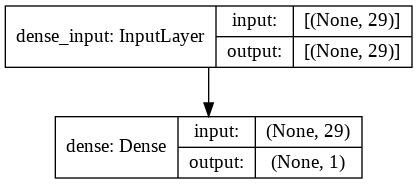

In [38]:
from tensorflow.keras.utils import plot_model

plot_model(model_1, show_shapes=True)

In [39]:
# Check the results of the  model
model_1_loss, model_1_mae = model_1.evaluate(X_test, y_test)

46/46 [==============================] - 0s 907us/step - loss: 1.2325 - mae: 1.2325


Model3 perfornance was mae: 1.2325

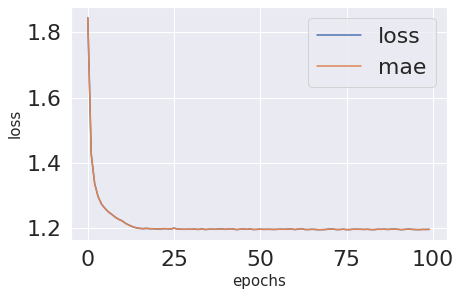

In [40]:
# Plot history (also known as a loss curve)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

Model improvement , by increasing one more layer

In [41]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# Fit the model
history = model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
181/181 [==============================] - 0s 1ms/step - loss: 1.1967 - mae: 1.1967
Epoch 2/100
181/181 [==============================] - 0s 1ms/step - loss: 1.1968 - mae: 1.1968
Epoch 3/100
181/181 [==============================] - 0s 1ms/step - loss: 1.1978 - mae: 1.1978
Epoch 4/100
181/181 [==============================] - 0s 1ms/step - loss: 1.1976 - mae: 1.1976
Epoch 5/100
181/181 [==============================] - 0s 1ms/step - loss: 1.1974 - mae: 1.1974
Epoch 6/100
181/181 [==============================] - 0s 985us/step - loss: 1.1969 - mae: 1.1969
Epoch 7/100
181/181 [==============================] - 0s 1ms/step - loss: 1.1971 - mae: 1.1971
Epoch 8/100
181/181 [==============================] - 0s 1ms/step - loss: 1.1965 - mae: 1.1965
Epoch 9/100
181/181 [==============================] - 0s 1ms/step - loss: 1.1965 - mae: 1.1965
Epoch 10/100
181/181 [==============================] - 0s 1ms/step - loss: 1.1959 - mae: 1.1959
Epoch 11/100
181/181 [===============

Executing time took 20 sec

In [42]:
# Check the results of the  model_2
model_2_loss, model_2_mae = model_2.evaluate(X_test, y_test)

46/46 [==============================] - 0s 899us/step - loss: 2.0004 - mae: 2.0004


Model perfornamce , Had mae: 2.0004

1.  Model performance did not improve rather It has poor perforamance compaered to the previous models
2.   This model is mis regarded



Making another Test

In [43]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as model_2)
model_3.fit(X_train, y_train, epochs=100, verbose=0) 


Execuation time 20 sec

In [44]:
model_3_loss, model_3_mae = model_3.evaluate(X_test, y_test)

46/46 [==============================] - 0s 1ms/step - loss: 1.2372 - mae: 1.2372


Model performance was  mae: 1.2372

Reapiting the same procedures by using nomalized data, To see if there will be any improvement

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [46]:
# Get SCV FILE
from google.colab import files
uploaded = files.upload()

Saving index_contacts_new.csv to index_contacts_new (1).csv


In [48]:
import io
Index_data = pd.read_csv(io.BytesIO(uploaded['index_contacts_new.csv']))
# Dataset is now stored in a Pandas Dataframe
Index_data

,client_id,Hiv_Index_Contact_Registration,Date,Site,Region,Sex_of_Index,Age_of_client_index,Type_ of_ relationship,Hiv_status
0,468,Hiv Index Contact Registration,9/16/2020 3:00,levolosihcw,Arusha,Female,45,sexual_partner,unknown
1,469,Hiv Index Contact Registration,9/16/2020 3:00,levolosihcw,Arusha,Female,39,sexual_partner,unknown
2,469,Hiv Index Contact Registration,9/16/2020 3:00,levolosihcw,Arusha,Female,57,sexual_partner,unknown
3,469,Hiv Index Contact Registration,9/16/2020 3:00,levolosihcw,Arusha,Female,15,biological_child_under_15,unknown
4,469,Hiv Index Contact Registration,9/16/2020 3:00,levolosihcw,Arusha,Female,60,sexual_partner,unknown
...,...,...,...,...,...,...,...,...,...
7223,4504,Hiv Index Contact Registration,9/16/2020 3:00,maguguhcw,Manyara,Female,25,sexual_partner,unknown
7224,4505,Hiv Index Contact Registration,9/16/2020 3:00,maguguhcw,Manyara,Female,36,sexual_partner,unknown
7225,4505,Hiv Index Contact Registration,9/16/2020 3:00,maguguhcw,Manyara,Male,43,sexual_partner,unknown
7226,4498,Hiv Index Contact Registration,9/16/2020 3:00,maguguhcw,Manyara,Female,61,sexual_partner,unknown


In [49]:
#Adding the target colunm
client_id_dict = {} 
for client_id in Index_data["client_id"]:
    if not client_id in client_id_dict:
        client_id_dict[client_id] = 1
    else:
        client_id_dict[client_id] += 1
        client_id_dict

In [50]:
for i in range(len(Index_data)):
    client_id = Index_data.loc[i]["client_id"]
    Index_data.at[i,"number_of_Hivindex"] = client_id_dict[client_id]

In [51]:
Index_data.head()

,client_id,Hiv_Index_Contact_Registration,Date,Site,Region,Sex_of_Index,Age_of_client_index,Type_ of_ relationship,Hiv_status,number_of_Hivindex
0,468,Hiv Index Contact Registration,9/16/2020 3:00,levolosihcw,Arusha,Female,45,sexual_partner,unknown,1.0
1,469,Hiv Index Contact Registration,9/16/2020 3:00,levolosihcw,Arusha,Female,39,sexual_partner,unknown,4.0
2,469,Hiv Index Contact Registration,9/16/2020 3:00,levolosihcw,Arusha,Female,57,sexual_partner,unknown,4.0
3,469,Hiv Index Contact Registration,9/16/2020 3:00,levolosihcw,Arusha,Female,15,biological_child_under_15,unknown,4.0
4,469,Hiv Index Contact Registration,9/16/2020 3:00,levolosihcw,Arusha,Female,60,sexual_partner,unknown,4.0


In [ ]:
# We drop some coloumns which have no impact to our target
data = Index_data.drop(columns=['client_id' ,'Hiv_Index_Contact_Registration','Date'])
data

In [53]:
# Turn all categories into numbers
data_one_hot = pd.get_dummies(data)
data_one_hot.head() # view the converted columns

,Age_of_client_index,number_of_Hivindex,Site_Babatihcw,Site_Haihcw,Site_Himohcw,Site_Majengo,Site_Majengohcw,Site_Manyarahcw,Site_Mawenzi,Site_Meru,Site_Mtmerufacility,Site_Mwanga,Site_PTC,Site_St.Elizabeth,Site_St.Joseph,Site_TPC,Site_elipendohcw,Site_levolosihcw,Site_maguguhcw,Region_Arusha,Region_Kilimanjaro,Region_Manyara,Sex_of_Index_Female,Sex_of_Index_Male,Type_ of_ relationship_biological_child_under_15,Type_ of_ relationship_drugs_injecting_partner,Type_ of_ relationship_sexual_partner,Hiv_status_negative,Hiv_status_positive,Hiv_status_unknown
0,45,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1
1,39,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1
2,57,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1
3,15,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1
4,60,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1


In [54]:
# Create X & y values
X = data_one_hot.drop(['number_of_Hivindex'], axis=1)
y = data_one_hot['number_of_Hivindex']

In [55]:
from sklearn.preprocessing import MinMaxScaler
# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)







In [56]:
# show scaled train set 
X_train_scaled[:1]

array([[0.02816901, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        ]])

In [57]:
 #show the shape after scalling 

print("Train set: {}".format(X_train_scaled.shape))
print("Test set: {}".format(X_test_scaled.shape)) 

Train set: (5782, 29)
Test set: (1446, 29)


In [58]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model 
model_4.fit(X_train_scaled, y_train, epochs=100, verbose=0) 

In [59]:
# Evaulate 4rd model

model_4_loss,model_4_mae = model_4.evaluate(X_test_scaled, y_test)

46/46 [==============================] - 0s 1ms/step - loss: 1.2357 - mae: 1.2357


In [60]:
# Check the model summary
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               3000      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 4,021
Trainable params: 4,021
Non-trainable params: 0
_________________________________________________________________


In [61]:
 # Set random seed
tf.random.set_seed(42)

# Replicate original model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_5 .compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# Fit the model
model_5.fit(X_train_scaled, y_train, epochs=100, verbose=0) 

In [62]:
# Check the model summary
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 30        
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [65]:
model_5_loss,model_5_mae = model_5.evaluate(X_test_scaled, y_test)

46/46 [==============================] - 0s 930us/step - loss: 1.2316 - mae: 1.2316


Comparing the rerults of neural network models

In [66]:
model_results = [["model_1", model_1_loss, model_1_mae],
                 ["model_2", model_2_loss, model_2_mae],
                 ["model_3", model_3_loss, model_3_mae],
                 ["model_4", model_4_loss, model_4_mae],
                 ["model_5", model_5_loss, model_5_mae]]


In [67]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "loss", "mae"])
all_results

,model,loss,mae
0,model_1,1.232451,1.232451
1,model_2,2.000391,2.000391
2,model_3,1.237183,1.237183
3,model_4,1.235711,1.235711
4,model_5,1.231626,1.231626


Comparing the mean absolute error of the five models of neural network ,model _5 has the smallest value among others.Hence model 5 is the best model

Saving the best model

In [69]:
predictions = model_5.predict(X_test_scaled)
predictions

array([[1.9949809],
       [2.2347872],
       [2.000361 ],
       ...,
       [1.9943928],
       [1.995347 ],
       [1.997346 ]], dtype=float32)

In [ ]:
# Save a model using the SavedModel format
model_5.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [ ]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls best_model_SavedModel_format

assets	keras_metadata.pb  saved_model.pb  variables


Saving model with another format

In [ ]:
# Save a model using the HDF5 format
model_5.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

In [ ]:
# Check it out
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


Loading a model
We can load a saved model using the load_model() method.

In [ ]:
#Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 1)                 33        
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


We have got the same result summary of saved model and the normal model.